In [3]:
%matplotlib inline
import networkx as nx
#import pygraphviz
import pyparsing
import numpy as np
import matplotlib.pylab as plt

from IPython.display import Math

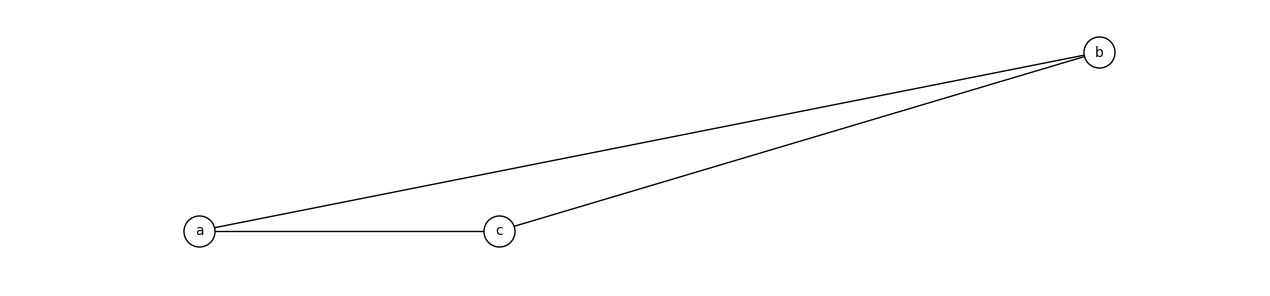

In [2]:
A = np.array([[0,1,1],[0,0,1],[1,0,0]])
G = nx.Graph(A)

labels = {0: "a", 1:"b", 2:"c"}
pos = [(0,0),(3,1),(1,0)]
plt.figure(figsize=(12,2.5))
nx.draw(G, pos, node_color="white", node_size=500, labels=labels, font_size=10, arrows=True)
#nx.draw(G, pos, node_color="white", node_size=500, arrows=False)
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()

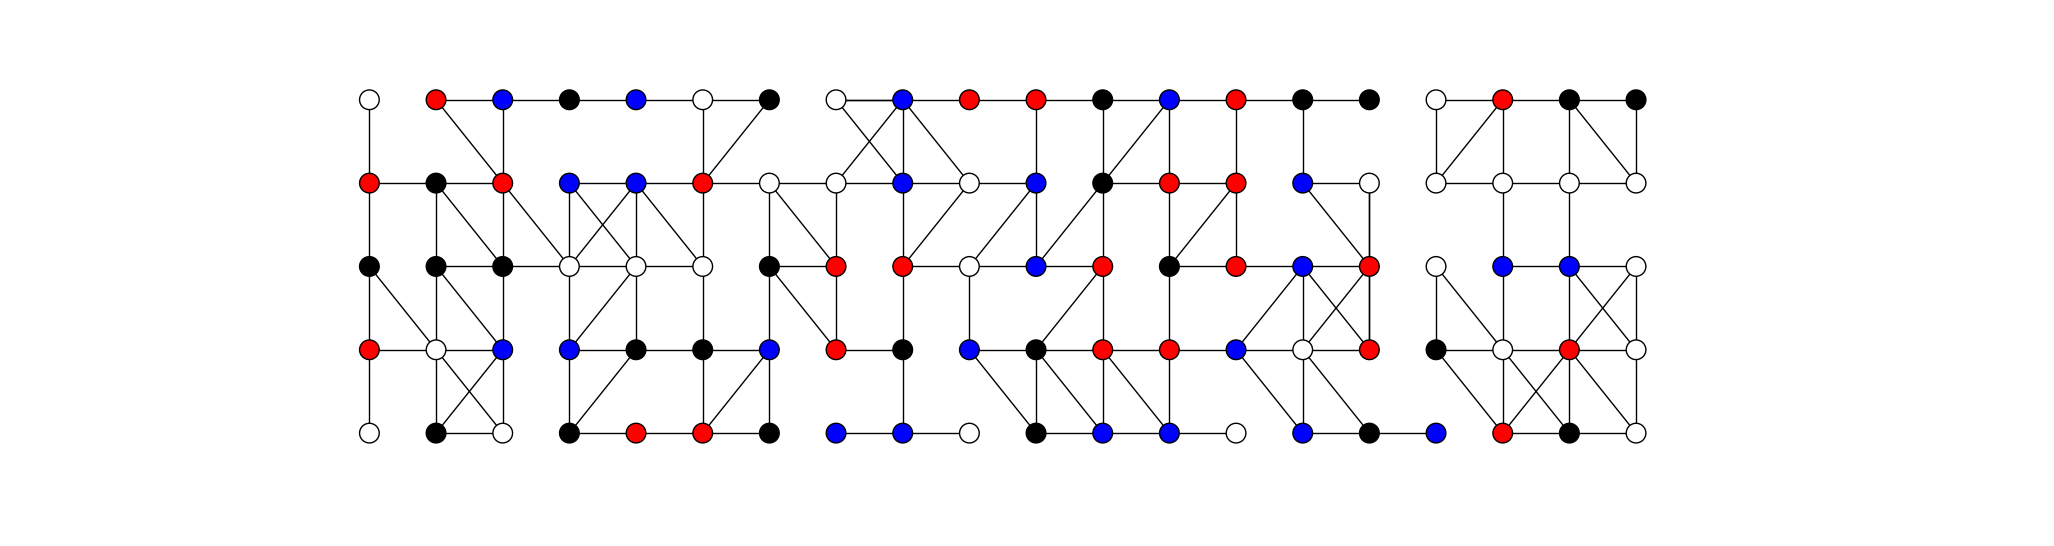

In [6]:
from itertools import product

M = 20;
N = 5
Z = 1.55
NN = M*N

A = np.zeros((NN,NN))
X = np.zeros((NN))
Y = np.zeros((NN))

sig = 0.25;
coords = []
cols = ("blue","red","white","black")
col = []
for i,j in product(range(N),range(M)):
    ex = np.random.randn(1)*sig
    ey = np.random.randn(1)*sig
    coords.append((j,i))
    X[i*M+j] = i+ex
    Y[i*M+j] = j+ey
    col.append(np.random.choice(cols))
    
    
    
for k,r in product(range(NN),range(NN)):
    if k != r:
        d = (X[k]-X[r])**2 + (Y[k]-Y[r])**2
        A[k,r] = 1 if d < Z else 0

G = nx.Graph(A)

plt.figure(figsize=(M,N))
#nx.draw(G, pos, node_color="white", node_size=500, labels=labels, font_size=10, arrows=True)
nx.draw(G, coords, node_color=col, node_size=200, arrows=False)
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()

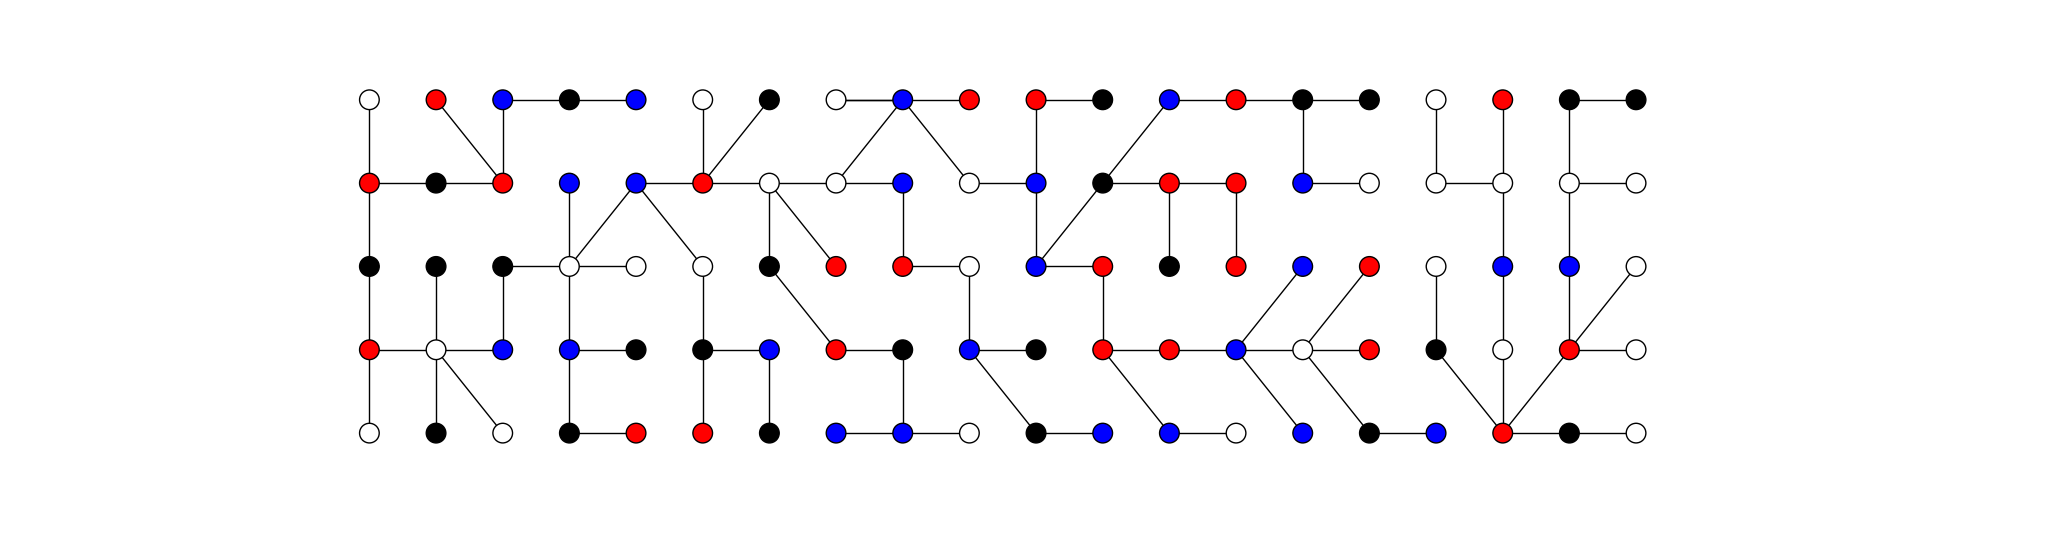

In [7]:
#t = nx.dfs_tree(G,0)
t = nx.prim_mst(G)
plt.figure(figsize=(M,N))
nx.draw(t, coords, node_color=col, node_size=200)
plt.show()



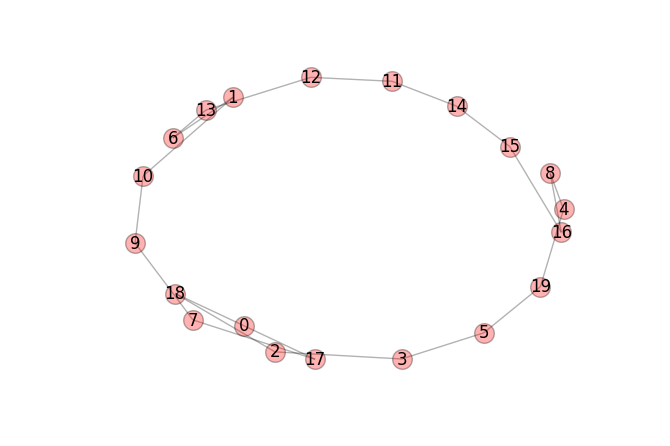

In [8]:
#nx.view_pygraphviz(G)
#H = nx.random_graphs.watts_strogatz_graph(20,5,0.1)
H = nx.random_graphs.random_regular_graph(2,20)

lbl = {e:e for e in range(20)}
#nx.view_pygraphviz(H)
nx.draw(H,labels=lbl,node_color="red",alpha=0.3, node_size=200)


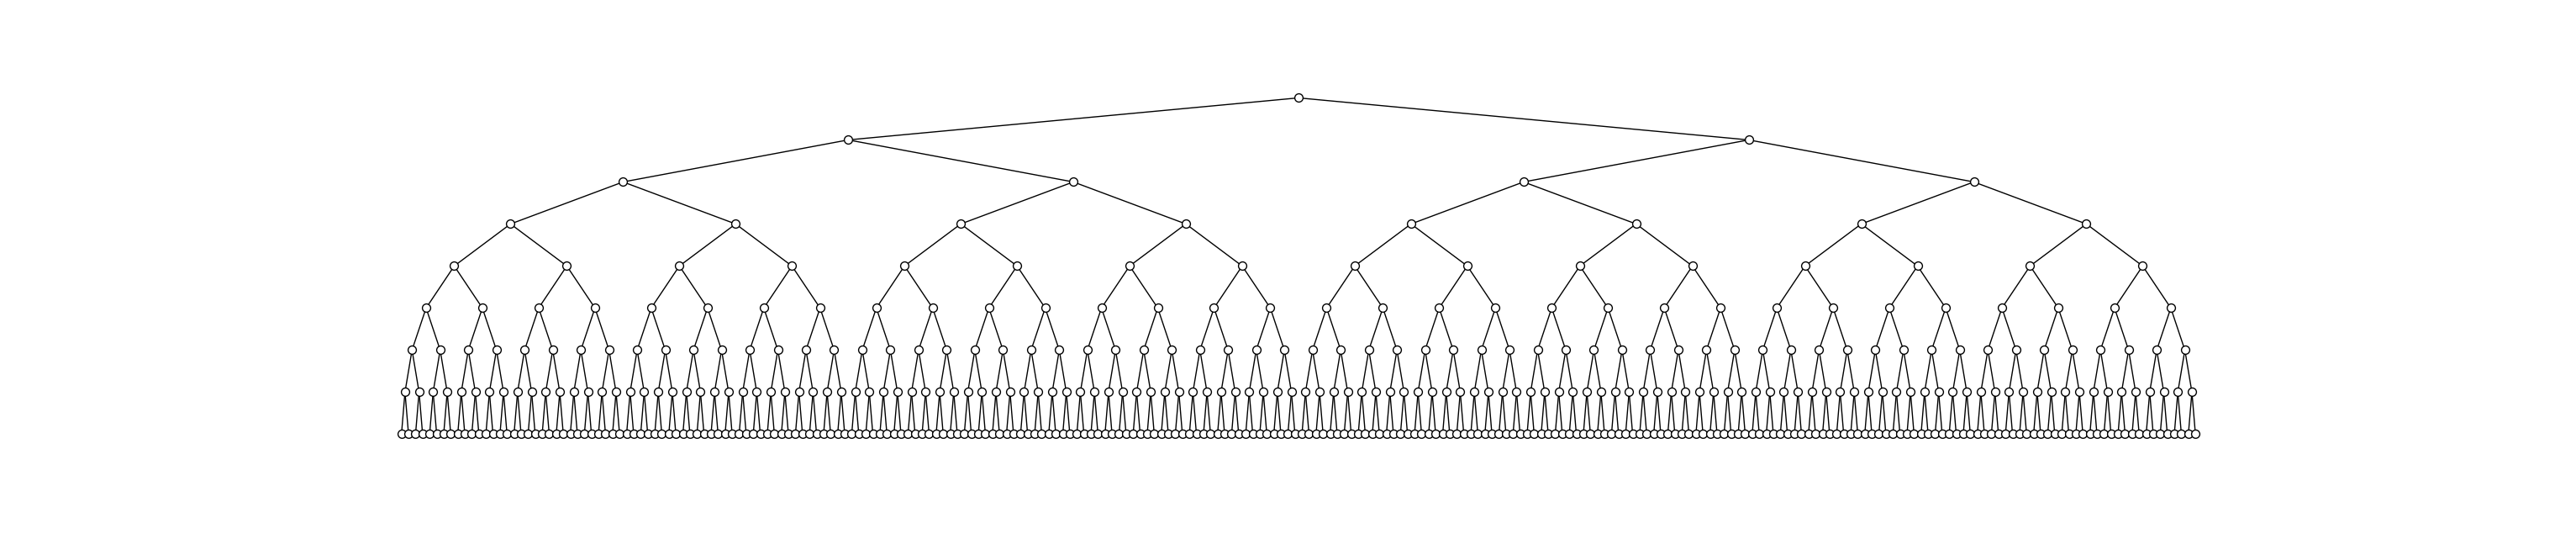

In [9]:
G = nx.Graph()

d = 9
G.add_node(0)
coord = [(0.5,0)]
depth = [0]

for n in range(2,256*2):
    G.add_node(n-1)
    p = int(np.floor(n/2))
    depth.append(depth[p-1]+1)
    if 2*p==n: # left child
        ep = -(1.0/(2**(depth[p-1]+2)))
    else:
        ep = 1.0/(2**(depth[p-1]+2)) 
    coord.append((coord[p-1][0]+ep,-(depth[p-1]+1)))
    G.add_edge(n-1,p-1)

plt.figure(figsize=(30,6))
nx.draw(G, coord, node_size=50,node_color='w')
#nx.draw_shell

[-1 49 22 47 44 18 33 23 40 15 33 47 29 47 36 22 13 10 49 25  4 23 14  4  5
 49 37  8 41  0 10 21 12  2 24 40  3 33  9 45 34 34 41 12 45 16 33 42 36 29]


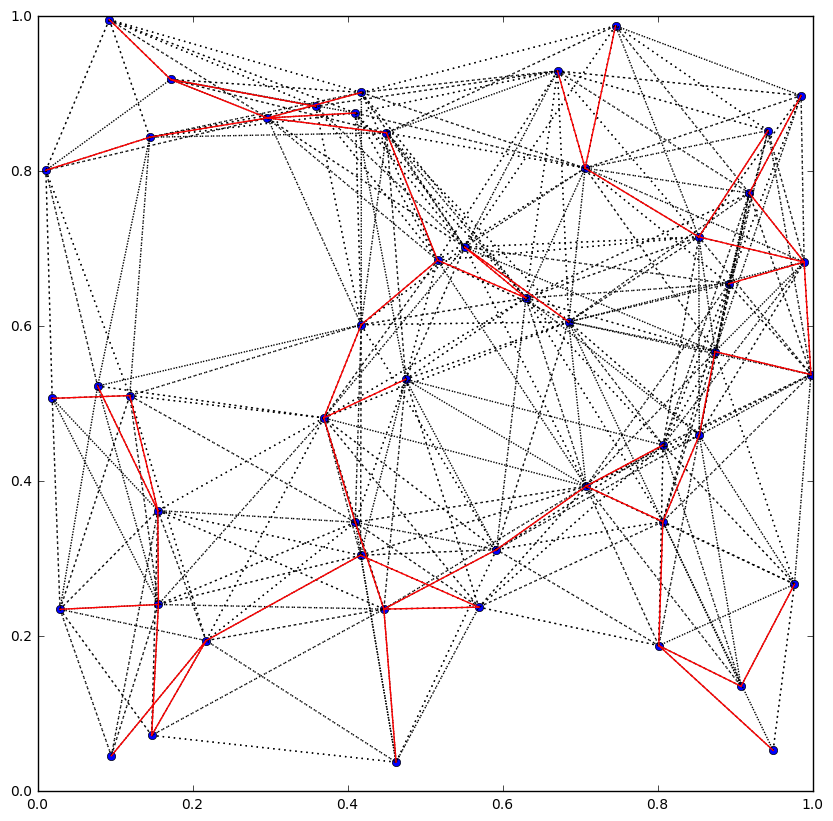

In [10]:
import heapq
import numpy as np

N = 50
thr = 0.35
lb = 0.1
X = np.random.rand(N,2)
D = np.zeros((N,N))

for i,j in product(range(N),range(N)):
    D[i,j] = np.sqrt((X[i,0]-X[j,0])**2 + (X[i,1]-X[j,1])**2)
    if D[i,j]>thr or D[i,j]<lb :
        D[i,j] = np.Inf

visited = np.empty(N,dtype=bool); visited.fill(False)

root = 0
visited[root] = True
numvis = 1;
spt = np.empty(N,dtype=int)
spt.fill(-1)
spt[root] = -1

q = []


for j in range(N):
    if np.isfinite(D[root,j]):
        heapq.heappush(q, (D[root,j], root, j))


while numvis<N:
    if len(q)==0:
        break;
    d,i,j = heapq.heappop(q)
    while len(q)>0 and visited[j]:
        d,i,j = heapq.heappop(q)
        
    spt[j] = i
    visited[j] = True
    numvis+=1
    
    for k in range(N):
        if np.isfinite(D[j,k]) and not visited[k]:
            heapq.heappush(q, (D[j,k], j, k))
    
print(spt)
    
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'o')
for i,j in product(range(N),range(N)):
    if not np.isinf(D[i,j]):
        plt.plot(X[[i,j],0],X[[i,j],1],'k:')
        
for u in range(N):
    if spt[u]!=-1:
        plt.plot(X[[u,spt[u]],0],X[[u,spt[u]],1],'r-')
    


plt.show()


In [11]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

N = 10

x = np.random.rand(N)
y = np.random.rand(N)

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# Plot the triangulation.
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-')
plt.title('triplot of Delaunay triangulation')
plt.show()

NameError: name 'min_radius' is not defined

* Traveling Salesman
* Complete Binary tree
* Spanning Tree
* Bipartite Graph
* Shortest Path Tree

In [33]:
%connect_info

{
  "stdin_port": 57484, 
  "ip": "127.0.0.1", 
  "control_port": 57485, 
  "hb_port": 57486, 
  "signature_scheme": "hmac-sha256", 
  "key": "062534bd-ecab-4960-b66c-4bdacfd6b692", 
  "shell_port": 57482, 
  "transport": "tcp", 
  "iopub_port": 57483
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /Users/cemgil/Library/Jupyter/runtime/kernel-28aae665-e995-49c2-a35c-c1740b4d8c4f.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.
